# Выполнение индивидуальных заданий по практической работе №7. Вариант 21 #

Создание необходимых таблиц в соответствии с ER диаграммой и заполнение таблиц данными

In [1]:
!pip install psycopg2


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import psycopg2
from psycopg2 import Error

In [17]:
import psycopg2

def get_connection(privSev):
    return psycopg2.connect(
        user="postgres",
        password="nekit", 
        host="localhost",
        port="5432",
        database=privSev
    )
def close_connection(connection):
    if connection:
        connection.close()
        print("Соединение с БД закрыто")
def create_database_tables():
    try: 
        connection = psycopg2.connect(
            user="postgres",
            password="nekit", 
            host="localhost",
            port="5432",
            database="privSev"
        )
        connection.autocommit = True
        cursor = connection.cursor()
        cursor.execute("CREATE DATABASE super_medical;")
        print("База данных super_medical создана")
        close_connection(connection)
        connection = get_connection("super_medical")
        cursor = connection.cursor()
        cursor.execute("""
            CREATE TABLE hospital (
                hospital_id INT PRIMARY KEY,
                hospital_name VARCHAR(100) NOT NULL,
                bed_count INT
            );
        """)
        cursor.execute("""
            INSERT INTO hospital (hospital_id, hospital_name, bed_count)
            VALUES
                (1, 'Mayo Clinic', 200),
                (2, 'Cleveland Clinic', 400),
                (3, 'Johns Hopkins', 1000),
                (4, 'UCLA Medical Center', 1500);
        """)
        connection.commit()
        print("Таблица hospital создана и заполнена данными")
        cursor.execute("""
            CREATE TABLE doctor (
                doctor_id INT PRIMARY KEY,
                doctor_name VARCHAR(100) NOT NULL,
                hospital_id INT NOT NULL,
                FOREIGN KEY (hospital_id) REFERENCES hospital(hospital_id),
                joining_date DATE NOT NULL,
                speciality VARCHAR(100) NOT NULL,
                salary INT NOT NULL,
                experience INT
            );
        """)
        cursor.execute("""
            INSERT INTO doctor (doctor_id, doctor_name, hospital_id, joining_date, speciality, salary, experience)
            VALUES
                (101, 'David', 1, '2005-02-10', 'Pediatric', 40000, NULL),
                (102, 'Michael', 1, '2018-07-23', 'Oncologist', 20000, NULL),
                (103, 'Susan', 2, '2016-05-19', 'Gynecologist', 25000, NULL),
                (104, 'Robert', 2, '2017-12-28', 'Pediatric', 28000, NULL),
                (105, 'Linda', 3, '2004-06-04', 'Gynecologist', 42000, NULL),
                (106, 'William', 3, '2012-09-11', 'Dermatologist', 30000, NULL),
                (107, 'Richard', 4, '2014-08-21', 'Gynecologist', 32000, NULL),
                (108, 'Karen', 4, '2011-10-17', 'Radiologist', 30000, NULL),
                (109, 'James', 1, '2022-01-15', 'Cardiologist', 45000, 5),
                (110, 'Emily', 1, '2023-04-10', 'Orthopedic Surgeon', 50000, 3),
                (111, 'Olivia', 2, '2021-09-05', 'Neurologist', 42000, 4),
                (112, 'John', 2, '2024-02-18', 'Surgeon', 60000, 2),
                (113, 'Sophia', 3, '2022-07-30', 'Urologist', 38000, 6),
                (114, 'Daniel', 3, '2025-03-22', 'Pulmonologist', 47000, 1),
                (115, 'Isabella', 4, '2023-11-01', 'Pediatrician', 41000, 3),
                (116, 'Liam', 4, '2022-05-25', 'Dermatologist', 35000, 4),
                (117, 'Mia', 1, '2024-06-17', 'Gastroenterologist', 53000, 2),
                (118, 'Lucas', 2, '2023-01-12', 'Anesthesiologist', 46000, 3);
        """)
        connection.commit()
        print("Таблица doctor создана и заполнена данными")

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при работе с БД:", error)
    finally:
        if 'connection' in locals():
            close_connection(connection)
create_database_tables()

База данных super_medical создана
Соединение с БД закрыто
Таблица hospital создана и заполнена данными
Таблица doctor создана и заполнена данными
Соединение с БД закрыто


## Индвидуальное задание №1, №2. Создайте таблицу "Patients_Visit" с полями "VISIT_ID", "PATIENT_ID", "DOCTOR_ID". Вставьте 5 визитов пациентов к врачам. ##

Для выполнения данного задания создадим таблицу patients, в соответствии с представленной ER диаграммой. 


Таблица patients_visit помимо указанных полей также будет содержать "date_of_visit" и "diagnosis". 

In [29]:
import psycopg2
from datetime import date

def get_connection(db_name):
    return psycopg2.connect(
        user="postgres",
        password="nekit", 
        host="localhost",
        port="5432",
        database="super_medical"
    )

def close_connection(connection):
    if connection:
        connection.close()
        print("Соединение с БД закрыто")

def create_tables():
    try:
        connection = get_connection("super_medical")
        print("Подключено")
        connection.autocommit = True
        cursor = connection.cursor()
        cursor.execute("DROP TABLE IF EXISTS patients_visit CASCADE;")
        cursor.execute("DROP TABLE IF EXISTS patients CASCADE;")
        cursor.execute("""
            CREATE TABLE patients (
                patient_id INT PRIMARY KEY,
                patient_name VARCHAR(50),
                birth_date DATE,
                sex VARCHAR(2)
            );
        """)
        cursor.execute("""
            CREATE TABLE patients_visit (
                visit_id SERIAL PRIMARY KEY,
                patient_id INT,
                doctor_id INT,
                date_of_visit DATE,
                diagnosis VARCHAR(200),
                FOREIGN KEY (patient_id) REFERENCES patients(patient_id)
            );
        """)
        cursor.execute("""
            ALTER TABLE patients
            ADD COLUMN visit_id INT;
        """)
        cursor.execute("""
            INSERT INTO patients (patient_id, patient_name, birth_date, sex, visit_id)
            VALUES
                (1, 'Ivanov Ivan', '1985-05-15', 'M', 1),
                (2, 'Anna Petrova', '1987-06-10', 'W', 2),
                (3, 'Aleksey Sidorov', '1990-01-01', 'M', 3),
                (4, 'Elena Kuznetsova', '1988-04-08', 'W', 4),
                (5, 'Denis Smirnov', '1993-09-03', 'M', 5);
        """)
        cursor.execute("""
            INSERT INTO patients_visit (visit_id, patient_id, doctor_id, date_of_visit, diagnosis)
            VALUES
                (1, 1, 101, '2024-03-03', 'Flu'),
                (2, 2, 103, '2024-04-04', 'Angina'),
                (3, 3, 106, '2024-05-05', 'Acne'),
                (4, 4, 109, '2024-06-06', 'Arrhythmia'),
                (5, 5, 101, '2024-07-07', 'Gastritis');
        """)
        
        connection.commit()
        print("Таблицы созданы и заполнены данными")
        
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при работе с БД:", error)
    finally:
        if 'connection' in locals():
            close_connection(connection)
if __name__ == "__main__":
    create_tables()
    

Подключено
Таблицы созданы и заполнены данными
Соединение с БД закрыто


## Индивидуальное задание №3. Выполните запрос для получения визитов пациента с ID=4. ##

In [32]:
import psycopg2
def search():
    try: 
        connection = psycopg2.connect(
            user="postgres",
            password="nekit", 
            host="localhost",
            port="5432",
            database="super_medical"
        )
        cursor = connection.cursor()
        
        cursor.execute('''
            SELECT visit_id, patient_id, diagnosis 
            FROM patients_visit 
            WHERE patient_id = 4
        ''')
        
        for row in cursor:
            print(row)
            
    except (Exception, psycopg2.Error) as error:
        print("Ошибка:", error)
    finally:
        if 'connection' in locals():
            connection.close()

search()
      
    

(4, 4, 'Arrhythmia')


## Индвидуальное задание №4. Обновите информацию о визите пациента с ID=3. ##

In [35]:
import psycopg2
from datetime import date
def search():
    try: 
        connection = psycopg2.connect(
            user="postgres",
            password="nekit", 
            host="localhost",
            port="5432",
            database="super_medical"
        )
        cursor = connection.cursor()
        cursor.execute('''
            SELECT * 
            FROM patients_visit
            WHERE patient_id =3
        ''')
        print("Изначальная информация о визите: ")
        for row in cursor:
            print(row)
        cursor.execute(
            '''UPDATE patients_visit 
             SET diagnosis = 'flu' 
             WHERE patient_id = 3
             '''
        )
        connection.commit()
        cursor.execute('''
            SELECT * 
            FROM patients_visit
            WHERE patient_id =3
        ''')
        print("Обновленная информация: ")
        for row in cursor:
            print(row)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка:", error)
    finally:
        if 'connection' in locals():
            connection.close()

search()

Изначальная информация о визите: 
(3, 3, 106, datetime.date(2024, 5, 5), 'Acne')
Обновленная информация: 
(3, 3, 106, datetime.date(2024, 5, 5), 'flu')


## Индивидуальное задание №5. Постройте столбчатую диаграмму для анализа визитов пациентов. ## 

In [37]:
!pip install matplotlib

     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------- -------------------------- 30.7/104.6 kB 660.6 kB/s eta 0:00:01
     ------------------------- ----------- 71.7/104.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 104.6/104.6 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.1/8.1 MB 8.3 MB/s eta 0:00:01
   -- ------------------------------------- 0.5/8.1 MB 4.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.1 MB 6.9 MB/s eta 0:00:02
   --------- ------------------------------ 1.9/8.1 MB 11.3 MB/s eta 0:00:01
   ------------------ --------------------- 3.8/8.1 MB 17.1 MB/s eta 0:00:01
   ----------------------- ---------------- 4.8/8.1 MB 19.2 MB/s eta 0:00:01
   -----------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


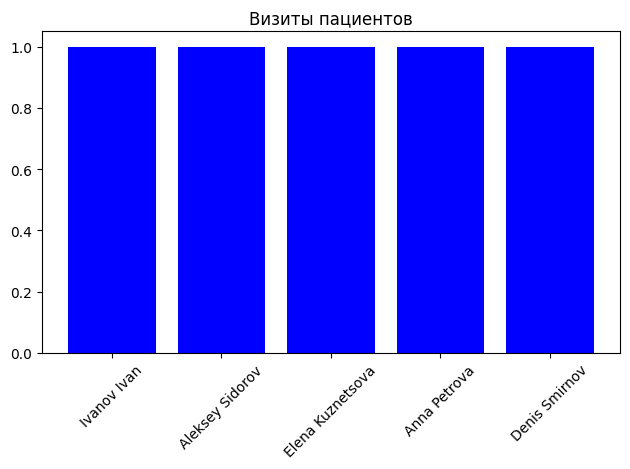

In [44]:
import psycopg2
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    user="postgres",
    password="nekit", 
    host="localhost",
    database="super_medical"
)

with conn.cursor() as cur:
    cur.execute("""
        SELECT patients.patient_name, COUNT(patients_visit.visit_id)
        FROM patients 
        LEFT JOIN patients_visit ON patients.patient_id = patients_visit.patient_id
        GROUP BY patients.patient_name
    """)
    names, counts = zip(*cur.fetchall())

plt.bar(names, counts, color='blue')
plt.title('Визиты пациентов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

conn.close()